# 문제1. 장바구니 이탈 여부 예측을 위해 필요한 라이브러리를 임포트하려합니다.
목표: pandas, numpy, seaborn, matplotlib 을 임포트하세요.

조건: seaborn은 sns, matplotlib.pyplot은 별칭 alias 지정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 문제2. 문제를 해결하기 위해, 분석 및 처리할 데이터 파일을 읽어오려고 합니다. pandas를 이용하여 cart_abandon.csv 파일을 불러오세요.
파일을 읽어 abandon_df라는 이름의 데이터프레임에 저장하세요.


In [2]:
url = "https://raw.githubusercontent.com/Heez27/AICE_Associate/main/csv/cart_abandon.csv"
abandon_df = pd.read_csv(url)
abandon_df.head()

,cart_value,num_items,device,time_on_site,prev_purchase,country,payment_method,discount_applied,user_type,cart_abandon_yn
0,267.87,5,mobile,NaN,Y,JP,card,N,guest,1
1,293.92,5,tablet,8.54,Y,CN,card,N,registered,0
2,33.67,9,mobile,7.16,Y,US,paypal,N,guest,0
3,102.33,8,tablet,4.13,N,CN,card,Y,guest,0
4,348.93,6,mobile,7.59,N,Others,card,N,guest,0


# 문제3. 사용자의 회원 유형(user_type)에 따라 웹사이트 체ㅔ류 시간(time_on_site)이 어떻게 다른지를 Seaborn을 이용하여 시각화를 통해 분석하고자 합니다.
Seaborn의 boxplot()을 사용하여 시각화하고, 결과를 바탕으로 올바른 해석을 고르세요.

결과는 '답04' 변수에 저장하세요.

x = user_type

y = time_on_site

In [3]:
abandon_df.groupby('user_type')['time_on_site'].mean()

,time_on_site
user_type,
guest,8.205293
registered,7.844683


<Axes: xlabel='user_type', ylabel='time_on_site'>

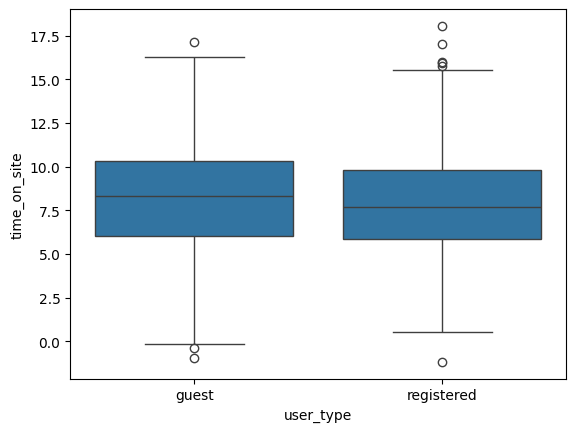

In [4]:
sns.boxplot(data=abandon_df, x="user_type", y="time_on_site")

# 문제4. 데이터 모델링을 하기 위해 결측치를 처리하고자 합니다.

time_on_site 컬럼의 결측치를 중앙값(median)으로 채우세요.

cart_value 컬럼의 결측치를 평균(mean)으로 채우세요.

inplace = True를 이용하세요.

In [5]:
abandon_df['time_on_site'].fillna(abandon_df['time_on_site'].median(), inplace = True)
abandon_df['cart_value'].fillna(abandon_df['cart_value'].mean(), inplace = True)

/tmp/ipython-input-576970352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  abandon_df['time_on_site'].fillna(abandon_df['time_on_site'].median(), inplace = True)
/tmp/ipython-input-576970352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

# 문제5. 범주형 변수들을 모델 학습에 사용할 수 있도록 Pandas의 get_dummies()를 사용하여 숫자형으로 변환(원-핫 인코딩)하세요.

drop_first=True 옵션 사용

incoding_df 변수에 처리한 데이터를 저장하세요.

In [6]:
# 아래 코드는 주어짐
abandon_df['prev_purchase'] = abandon_df['prev_purchase'].map({'Y':1, 'N':0})
abandon_df['discount_applied'] = abandon_df['discount_applied'].map({'Y':1, 'N':0})
abandon_df['user_type'] = abandon_df['user_type'].map({'registered':1, 'guest':0})

cat_col = ['device', 'country', 'payment_method']

In [8]:
incoding_df = pd.get_dummies(abandon_df, columns=cat_col, drop_first=True)
incoding_df.head()

,cart_value,num_items,time_on_site,prev_purchase,discount_applied,user_type,cart_abandon_yn,device_mobile,device_tablet,country_JP,country_KR,country_Others,country_US,payment_method_card,payment_method_paypal
0,267.87,5,8.095,1,0,0,1,True,False,True,False,False,False,True,False
1,293.92,5,8.540,1,0,1,0,False,True,False,False,False,False,True,False
2,33.67,9,7.160,1,0,0,0,True,False,False,False,False,True,False,True
3,102.33,8,4.130,0,1,0,0,False,True,False,False,False,False,True,False
4,348.93,6,7.590,0,0,0,0,True,False,False,False,True,False,True,False


# 문제6. 모델링에 사용되지 않는 num_items 컬럼을 삭제하고자 한다.

axis = 1, inplace = True 사용하기

In [9]:
incoding_df.drop(['num_items'], axis=1, inplace = True)

In [10]:
incoding_df

,cart_value,time_on_site,prev_purchase,discount_applied,user_type,cart_abandon_yn,device_mobile,device_tablet,country_JP,country_KR,country_Others,country_US,payment_method_card,payment_method_paypal
0,267.870000,8.095,1,0,0,1,True,False,True,False,False,False,True,False
1,293.920000,8.540,1,0,1,0,False,True,False,False,False,False,True,False
2,33.670000,7.160,1,0,0,0,True,False,False,False,False,True,False,True
3,102.330000,4.130,0,1,0,0,False,True,False,False,False,False,True,False
4,348.930000,7.590,0,0,0,0,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,328.450000,8.760,0,0,0,1,True,False,False,False,True,False,False,False
1296,137.040000,10.500,0,0,0,0,False,False,False,False,False,True,True,False
1297,262.188534,6.820,1,1,1,0,False,False,False,False,False,True,True,False
1298,136.750000,6.210,0,0,0,0,False,False,True,False,False,False,False,False


# 문제7. time_on_site는 사이트 체류 시간을 나타내는 변수입니다. 해당 컬럼에는 음수 값(0보다 작은 값)이 존재하며, 이는 이상치로 간주됩니다.

time_on_site 변수에서 0 미만의 데이터들은 삭제처리하기.

삭제처리된 데이터는 filtereing_df로 저장하고, reset_index()를 이용하여 index를 초기화하기.

reset_index()에서는 drop=True, inplace=True를 사용하기.

In [11]:
filtereing_df = incoding_df.drop(incoding_df[incoding_df['time_on_site']<0].index, axis = 0)
filtereing_df.reset_index(drop=True,  inplace=True)

# 문제8. 모델 학습을 위해 feature(X)와 target(y)를 분리하고자 한다.

X = 'cart_abandon_yn'제외 전부

y = 'cart_abandon_yn'

In [12]:
X = filtereing_df.drop(columns = ['cart_abandon_yn'], axis = 1)
y = filtereing_df['cart_abandon_yn']

# 문제9. 모델 학습과 평가를 위해 학습용(train)과 테스트용(test)로 분리하려고한다.

데이터셋을 분리하기 위해 train_test_split을 import 하세요.

훈련 데이터 셋 = X_train, y_train

검증 데이터 셋 = X_train, y_valid

random_state = 42

훈련 데이터셋과 검증 데이터셋의 비율을 8:2

y 데이터를 훈련과 검증 데이터셋으로 균등하게 분리하기 위해 statify옵션을 사용하세요.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state = 42 ,test_size = 0.2, stratify = y)

# 문제10. 모델 학습에 앞서 특성간의 스케일 차이를 줄이기 위해 데이터를 표준화(standardization)하려 한다. StandardScaler를 이용하여 X_train, X_valid를 평균 0, 표준편차 1의 분포로 변환하세요.

StandardScaler적용

X_train은 fit_transform을 이용하여 X_train 변수에 저장

X_valid는 transform을 이용하여 X_test의 변수에 저장

In [21]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_valid)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# 문제11. RandomForestClassifier를 이용하여 분류 모델을 학습하려고 한다.

랜덤포레스트모델을 rfc 변수에 저장하세요.

n_estimators=100, max_depth=7, random_state=42

훈련은 스케일링 처리된 데이터를 사용하기.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

# 문제12. XGBClassifier를 사용하여 분류모델을 학습하려고 한다.

XGBClassifier 모델을 xgbc 변수에 저장하기

n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42

훈련은 스케일링 처리된 데이터를 사용하기

In [26]:
from xgboost import XGBClassifier

In [27]:
xgbc = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

# 문제13. 앞서 학습한 모델을 사용하여 테스트 데이터 X_test, y_test에 대한 예측을 수행한다. 그 후, 예측 결과를 기반으로 Accuracy와 F1 Score를 계산하여 모델의 성능을 평가한다.

randomforest의 predict를 이용하여 검증 데이터를 예측하고, 예측된 데이터는 rfc_predict 변수에 저장하기

xgboost의 predict를 이용하여 검증 데이터를 예측하고, 예측된 데이터는 xgbc_predict 변수에 저장하기.

accuracy_score, f1_score 사용하여 두 모델의 acc와 f1-score를 출력하기.

In [28]:
from sklearn.metrics import accuracy_score, f1_score

In [36]:
rfc_predict = rfc.predict(X_test)
xgbc_predict = xgbc.predict(X_test)

print('rfc accuracy', accuracy_score(y_valid, rfc_predict)) # y_valid, rfc_predict 거꾸로 써도 됨.
print('rfc f1_score', f1_score(y_valid, rfc_predict))
print('xgbc accuracy', accuracy_score(y_valid, xgbc_predict))
print('xgbc f1_score', f1_score(y_valid, xgbc_predict))

rfc accuracy 0.46923076923076923
rfc f1_score 0.4344262295081967
xgbc accuracy 0.6692307692307692
xgbc f1_score 0.0


# 문제 14. 주어진 입력 데이터 (X_train_scaled, y_train)를 활용하여 딥러닝 분류 모델을 설계하고 학습하려 한다.

Dense(64, relu) -> Dense(32, relu) -> Dense(2, softmax)

optimizer: adam

loss: categorical_crossentropy

metric: accuracy

epochs=50, batch_size=128

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

y_train = to_categorical(y_train, num_classes=2)
y_valid = to_categorical(y_valid, num_classes=2)

In [40]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],))) # input_shape=(X_train.shape[1],) 넣기!!
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6377 - loss: 0.6652 - val_accuracy: 0.6692 - val_loss: 25.8040
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6667 - loss: 0.6384 - val_accuracy: 0.6692 - val_loss: 23.0726
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6717 - loss: 0.6287 - val_accuracy: 0.6692 - val_loss: 20.1154
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6772 - loss: 0.6235 - val_accuracy: 0.6692 - val_loss: 18.5846
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6828 - loss: 0.6194 - val_accuracy: 0.6692 - val_loss: 17.5298
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6830 - loss: 0.6160 - val_accuracy: 0.6692 - val_loss: 16.4018
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6817 - loss: 0.6130 - val_accuracy: 0.6692 - val_loss: 15.2142
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6820 - loss: 0.6101 - val_accuracy: 0.6692 - val_loss: 